# PRESENTACIÓN ACÁMICA: Dataset Recorridos Realizados EcoBici 2018
<img src= https://imgsvr.radiocut.site/get/thumb/900/900/cuts_logos/64/dd/64ddc026-2210-47f1-bb91-f62c3ae44f6f.png width= 300>

>EcoBici, es un sistema de bicicletas compartidas que funciona en la Ciudad de Buenos Aires, cuenta con 400 estaciones y 4000 rodados y en 2018 más de 200.000 usuarios realizaron más de 8 millones de viajes durante el año*. Una característica no usual en este tipo de sistema es que su uso, que requiere un registro previo, es totalmente gratuito tanto para residentes locales como para turistas.

>A partir de 2019, el sistema es operado por la empresa brasileña Tembici conforme a una norma que aprobó la Legislatura porteña meses atrás. Se planea la duplicación de bicicletas y estaciones.Actualmente el sistema está presente en 38 de los 48 barrios de la Ciudad Autónoma de Buenos Aires, funcionando los 365 días del año 24 horas.[(Wikipedia, consultado el 24/10/2019)](https://es.wikipedia.org/wiki/EcoBici_(Buenos_Aires))

Página de referencia: https://data.buenosaires.gob.ar/dataset/bicicletas-publicas

Fuente primaria: Ministerio de Desarrollo Urbano y Transporte. SS de Movilidad Sustentable y Segura. (Subsecretaria: Paula Bisiau, Ministro: Franco Moccia)

Mantenedor:
Secretaría General y Relaciones Internacionales. Subsecretaría Gestión Estratégica y Calidad Institucional. Dirección General Calidad Institucional y Gobierno Abierto, Jefatura de Gobierno GCBA.

Licencia Atribución 2.5 Argentina (CC BY 2.5 AR)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Acá configuramos el tamaño de las figuras
plt.rcParams['figure.figsize'] = (24,16)
# Seteamos opciones de pandas sobre las columnas y su ancho
pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)

In [3]:
df = pd.read_csv("dataset/recorridos-realizados-2018.csv", parse_dates = ["bici_Fecha_hora_retiro","bici_tiempo_uso"])

## 1) ¿Cómo empezar? Primera aproximación al *dataset*
Primero me propuse ver información general sobre el *dataset*, de manera de tener una idea general sobre el mismo (cómo se ve, cantidad de columnas y sus valores, cantidad de filas, tipos de valores, número de NaNs y estadísticas descriptivas).

In [4]:
df.head(10)

,bici_id_usuario,bici_Fecha_hora_retiro,bici_tiempo_uso,bici_nombre_estacion_origen,bici_estacion_origen,bici_nombre_estacion_destino,bici_estacion_destino,bici_sexo,bici_edad
0,5453,2018-01-01 00:08:05,0 days 00:19:53.000000000,Uruguay,45,Virrey Cevallos,183,M,45
1,673,2018-01-01 00:18:05,0 days 00:26:19.000000000,Posadas,189,Guardia Vieja,110,M,61
2,179119,2018-01-01 00:20:14,0 days 00:27:39.000000000,Hospital Rivadavia,50,Padilla,31,F,52
3,400147,2018-01-01 00:20:22,0 days 00:48:51.000000000,Macacha Güemes,111,Acuña de Figueroa,54,M,27
4,400156,2018-01-01 00:20:31,0 days 00:49:27.000000000,Macacha Güemes,111,Acuña de Figueroa,54,F,27
5,476733,2018-01-01 00:21:01,0 days 00:36:10.000000000,Yatay,121,Billinghurst y Valentin Gomez,143,F,31
6,326932,2018-01-01 00:21:30,0 days 00:35:31.000000000,Yatay,121,Billinghurst y Valentin Gomez,143,F,28
7,347609,2018-01-01 00:22:48,0 days 00:31:07.000000000,Pque. Jose Evaristo Uriburu,155,Cerrito,71,M,27
8,392077,2018-01-01 00:23:46,0 days 00:34:28.000000000,Obelisco,7,Azucena Villaflor,79,F,29
9,457895,2018-01-01 00:24:19,0 days 00:17:08.000000000,Obelisco,7,Colegio Nacional Buenos Aires,47,F,26


In [7]:
df.tail()

,bici_id_usuario,bici_Fecha_hora_retiro,bici_tiempo_uso,bici_nombre_estacion_origen,bici_estacion_origen,bici_nombre_estacion_destino,bici_estacion_destino,bici_sexo,bici_edad
2619963,190597,2018-12-30 19:46:32,0 days 00:07:15.000000000,Plaza Primero de Mayo,75,México,118,M,21
2619964,119885,2018-12-30 19:48:14,0 days 00:09:59.000000000,Virrey Liniers,139,EEUU y Boedo,199,F,22
2619965,652034,2018-12-30 19:48:51,0 days 00:10:32.000000000,Peña,30,Ayacucho,76,F,20
2619966,467438,2018-12-30 19:51:42,0 days 00:09:57.000000000,Sánchez de Bustamante,52,Sánchez de Bustamante,52,M,26
2619967,265951,2018-12-30 19:52:41,0 days 00:10:26.000000000,Parque Lezama,6,Azopardo y Chile,137,M,41


In [8]:
df.shape

(2619968, 9)

El dataset posee 2.619.968 filas y 9 columnas.

## *Nota: <font color= red>¿Por qué dice 2 millones 600 mil viajes en el dataset y Wikipedia dice que Paula Bisiau -Subsecretaria de Movilidad Sustentable- declara que fueron más de ocho millones en la afirmación de más arriba?</font> Es importante verificar el discurso público cuando sea posible, y para eso ayuda la ciencia de datos.

## Ambos vínculos a la supuesta afirmación de Bisiau en Wikipedia no existen más, uno está roto y el otro cambió de contenido. La explicación parece ser una mala intepretación de texto, como se ve en otro artículo que encontré en donde dice: 

>"El informe de Transporte indicó que ingresan por día a la Ciudad 2.950.000 de personas desde la Región Metropolitana y que se realizan aproximadamente 8 millones de viajes, de los cuales 57,5% son en colectivo, 18% en subte, 1% en ferrocarril, 3,5% en bicicleta, 4% en taxis y el 16% restante en vehículos privados y motos. Esta distribución muestra que 84% de los viajes se hacen en transporte público." (http://www.noticiasurbanas.com.ar/noticias/el-gobierno-porteno-presento-el-primer-plan-de-seguridad-vial/)

## Las 9 columnas y los tipos de datos en ellas

In [9]:
list(df.columns)

['bici_id_usuario',
 'bici_Fecha_hora_retiro',
 'bici_tiempo_uso',
 'bici_nombre_estacion_origen',
 'bici_estacion_origen',
 'bici_nombre_estacion_destino',
 'bici_estacion_destino',
 'bici_sexo',
 'bici_edad']

In [9]:
df.dtypes #con "parse_dates" cambia de object a datetime64

bici_id_usuario                          int64
bici_Fecha_hora_retiro          datetime64[ns]
bici_tiempo_uso                         object
bici_nombre_estacion_origen             object
bici_estacion_origen                     int64
bici_nombre_estacion_destino            object
bici_estacion_destino                    int64
bici_sexo                               object
bici_edad                                int64
dtype: object

## Estadísticas descriptivas

In [11]:
df.describe() # Sólo tiene sentido para EDAd, ya que el resto son categóricas pero expresadas mediante números.

,bici_id_usuario,bici_estacion_origen,bici_estacion_destino,bici_edad
count,2.619968e+06,2.619968e+06,2.619968e+06,2.619968e+06
mean,3.281220e+05,9.499050e+01,9.540232e+01,3.322898e+01
std,1.864424e+05,5.859776e+01,5.862938e+01,1.112349e+01
min,8.000000e+00,1.000000e+00,1.000000e+00,1.600000e+01
25%,1.577910e+05,4.100000e+01,4.200000e+01,2.500000e+01
50%,3.531940e+05,9.100000e+01,9.200000e+01,3.000000e+01
75%,4.917370e+05,1.460000e+02,1.470000e+02,3.900000e+01
max,6.724490e+05,6.000000e+02,6.000000e+02,1.400000e+02


## Valores nulos
Hay 43.723 NaN en la columna "bici_tiempo_uso", que es la única que tiene NaNs.

In [12]:
df.isna().sum()

bici_id_usuario                     0
bici_Fecha_hora_retiro              0
bici_tiempo_uso                 43723
bici_nombre_estacion_origen         0
bici_estacion_origen                0
bici_nombre_estacion_destino        0
bici_estacion_destino               0
bici_sexo                           0
bici_edad                           0
dtype: int64

## Cantidad y nombre de las estaciones de Ecobici

In [34]:
df.bici_nombre_estacion_origen.nunique()

199

In [32]:
df.bici_nombre_estacion_origen.unique()

array(['Uruguay', 'Posadas', 'Hospital Rivadavia', 'Macacha Güemes',
       'Yatay', 'Pque. Jose Evaristo Uriburu', 'Obelisco', 'Plaza Boedo',
       'Hipolito Yrigoyen', 'Ministro Carranza', 'Plaza Italia',
       'Hospital Garrahan', 'Virrey Cevallos',
       'Colegio Nacional Buenos Aires', 'Maipú', 'La Boca',
       'Senillosa y Zuviria', 'Aranguren', 'Humberto 1º',
       'Ministerio de Educacion', 'Avelino Diaz', 'Hospital Francés',
       'Federico Lacroze', 'Ayacucho', 'Virrey Liniers',
       'Hospital Alemán', 'Padilla', '25 de Mayo', 'Azopardo y Chile',
       'Juana Manso', 'Brasil', 'Acuña de Figueroa', 'Azucena Villaflor',
       'Armenia y Gorriti', 'Coronel Díaz', 'Plaza Güemes',
       'Plaza Primero de Mayo', 'Montevideo', 'Riobamba', 'Guatemala',
       'Independencia', 'Guayaquil', 'Parque Patricios',
       'Peron y F. Acuña de Figueroa', 'Plaza Roma', 'Juncal',
       'Talcahuano', 'Agüero', 'Las casas', 'Velasco', 'Cerrito',
       'Suipacha', 'Humahuaca', 'EEUU 

# 2) Ya con algunas características del DS en la cabeza, comenzaron a surgirme preguntas e hipótesis.


### 1. ¿Usaron más el sistema los hombres o las mujeres?
### 2. ¿Cómo varía la demanda total durante el año? (estacionalidad) Hipótesis: en épocas de calor se usan menos.
### 3. 1.¿Cual estación se usó más, y cuál menos? 2. ¿Qué porcentaje de M o F iniciaron los viajes en esas estaciones?
### 4. ¿Qué segmento etario utilizó más el sistema? 
### 5. ¿Hay registrados viajes iniciados y no finalizados?


--------------------------------------------------------------------------------------------------------------------------
# 1.

In [32]:
df["bici_sexo"].unique()

array(['M', 'F', 'N'], dtype=object)

In [28]:
df["bici_sexo"].nunique()

3

In [7]:
df["bici_sexo"].value_counts()

M    1880740
F     739160
N         68
Name: bici_sexo, dtype: int64

Text(0.5, 1.0, 'Usuarios totales según SEXO, 2018')

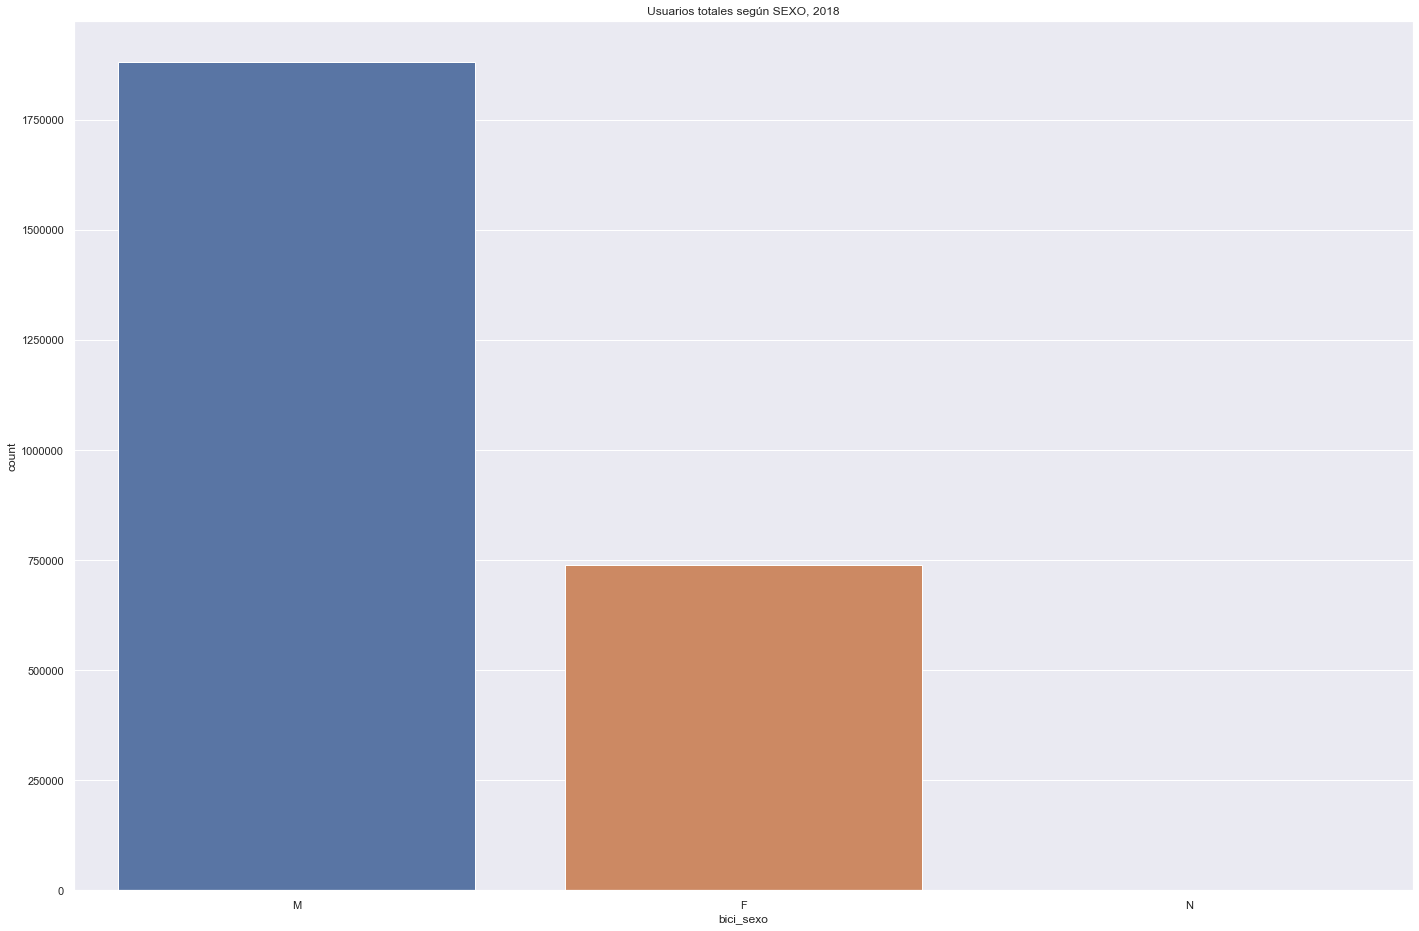

In [6]:
sns.set(style="darkgrid")
sns.countplot("bici_sexo", data=df).set_title("Usuarios totales según SEXO, 2018") #Cómo eliminar la columnas Nans, que no tiene valores


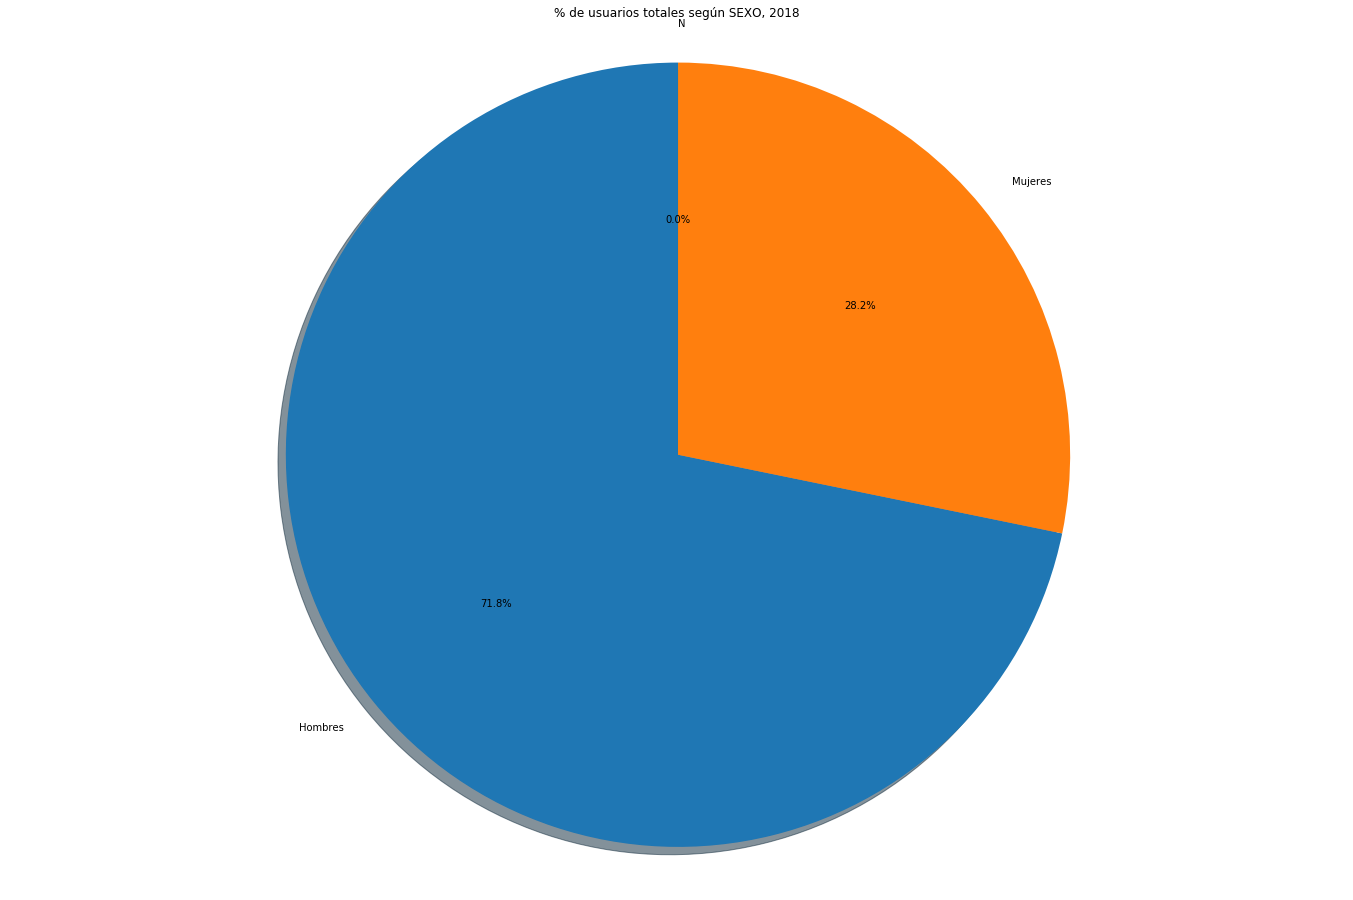

In [21]:
labels = 'Hombres', 'Mujeres', 'N'
sizes = [1880740, 739160, 68]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.set_title("% de usuarios totales según SEXO, 2018")

plt.show()


ValueError: could not convert string to float: 'Hombres'

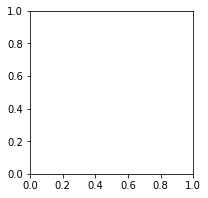

In [22]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

usos = ['Hombres 1880740', 
        'Mujeres 739160', 
        'N 68']


data = [float(x.split()[0]) for x in usos]
ingredients = [x.split()[-1] for x in usos]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Matplotlib bakery: A pie")

plt.show()

## RTA: Utilizaron el sistema más los hombres que las mujeres, un 71,8% contra un 28,2%.

# 2. 

In [ ]:
#inserte respuesta aquí 
df.groupby(df.bici_Fecha_hora_retiro)
bi


# 3.1

In [43]:
df["bici_nombre_estacion_origen"].value_counts()

Facultad de Medicina       38858
Pacífico                   36834
Parque Las Heras           36500
Plaza Italia               32722
Retiro III                 30765
                           ...  
Santos Dumont y Otero       2419
Plaza Houssay               2213
Hospital Sarda              2090
Plaza Hipolito Bouchard     1287
PALACIO LEZAMA                 5
Name: bici_nombre_estacion_origen, Length: 199, dtype: int64

Text(0.5, 1.0, 'VIAJES INICIADOS: Cantidad de viajes totales según ESTACIÓN DE ORIGEN, 2018')

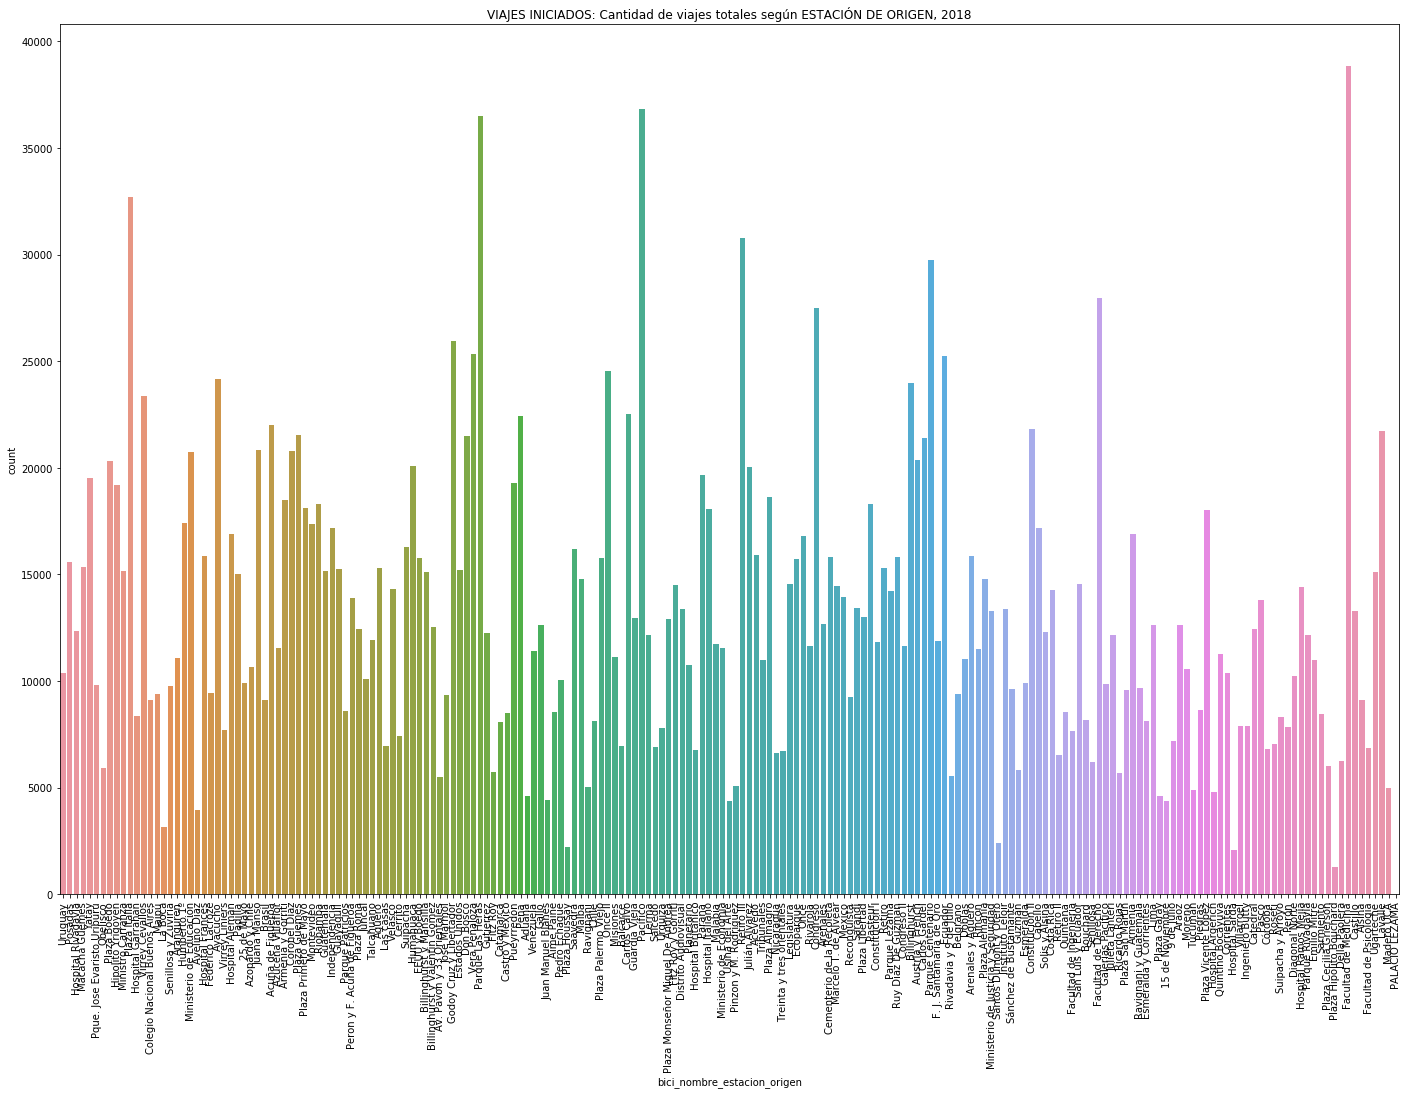

In [19]:
## 3.1
plt.xticks(rotation = 90)
sns.countplot("bici_nombre_estacion_origen", data=df).set_title("VIAJES INICIADOS: Cantidad de viajes totales según ESTACIÓN DE ORIGEN, 2018") #No se vé nada y no sé cómo agrandarlo

RTA: La estación más usada fue Facultad de Medicina y la menos usada la de Palacio Lezama. Al tener tan pocos usuarios , utilizaré la inmediatamente anterior, Plaza Hipólito Bouchard (ambas de las últimas en inaugurarse).

# 3.2

# 4. Esto requiere binning de la variable "bici_edad" (categorías inventadas por mí). 

In [91]:
bins = [16, 20, 29, 38, 55, 100] #incluye al segundo número y por encima de él entra en el otro grupo
nombres_grupo = ["Adolescentes (16-20)", "Jóvenes (21-29)", "Adultos Jóvenes (30-38)", "Adultos (39-55)", "Adultos Mayores (55+)"]
df["Grupo_Etario"] = pd.cut(df["bici_edad"], bins, labels= nombres_grupo)
df

,bici_id_usuario,bici_Fecha_hora_retiro,bici_tiempo_uso,bici_nombre_estacion_origen,bici_estacion_origen,bici_nombre_estacion_destino,bici_estacion_destino,bici_sexo,bici_edad,Grupo_Etario
0,5453,2018-01-01 00:08:05,0 days 00:19:53.000000000,Uruguay,45,Virrey Cevallos,183,M,45,Adultos (39-55)
1,673,2018-01-01 00:18:05,0 days 00:26:19.000000000,Posadas,189,Guardia Vieja,110,M,61,Adultos Mayores (55+)
2,179119,2018-01-01 00:20:14,0 days 00:27:39.000000000,Hospital Rivadavia,50,Padilla,31,F,52,Adultos (39-55)
3,400147,2018-01-01 00:20:22,0 days 00:48:51.000000000,Macacha Güemes,111,Acuña de Figueroa,54,M,27,Jóvenes (21-29)
4,400156,2018-01-01 00:20:31,0 days 00:49:27.000000000,Macacha Güemes,111,Acuña de Figueroa,54,F,27,Jóvenes (21-29)
...,...,...,...,...,...,...,...,...,...,...
2619963,190597,2018-12-30 19:46:32,0 days 00:07:15.000000000,Plaza Primero de Mayo,75,México,118,M,21,Jóvenes (21-29)
2619964,119885,2018-12-30 19:48:14,0 days 00:09:59.000000000,Virrey Liniers,139,EEUU y Boedo,199,F,22,Jóvenes (21-29)
2619965,652034,2018-12-30 19:48:51,0 days 00:10:32.000000000,Peña,30,Ayacucho,76,F,20,Adolescentes (16-20)
2619966,467438,2018-12-30 19:51:42,0 days 00:09:57.000000000,Sánchez de Bustamante,52,Sánchez de Bustamante,52,M,26,Jóvenes (21-29)


Text(0.5, 1.0, 'Cantidad de VIAJES según GRUPO ETARIO, 2018')

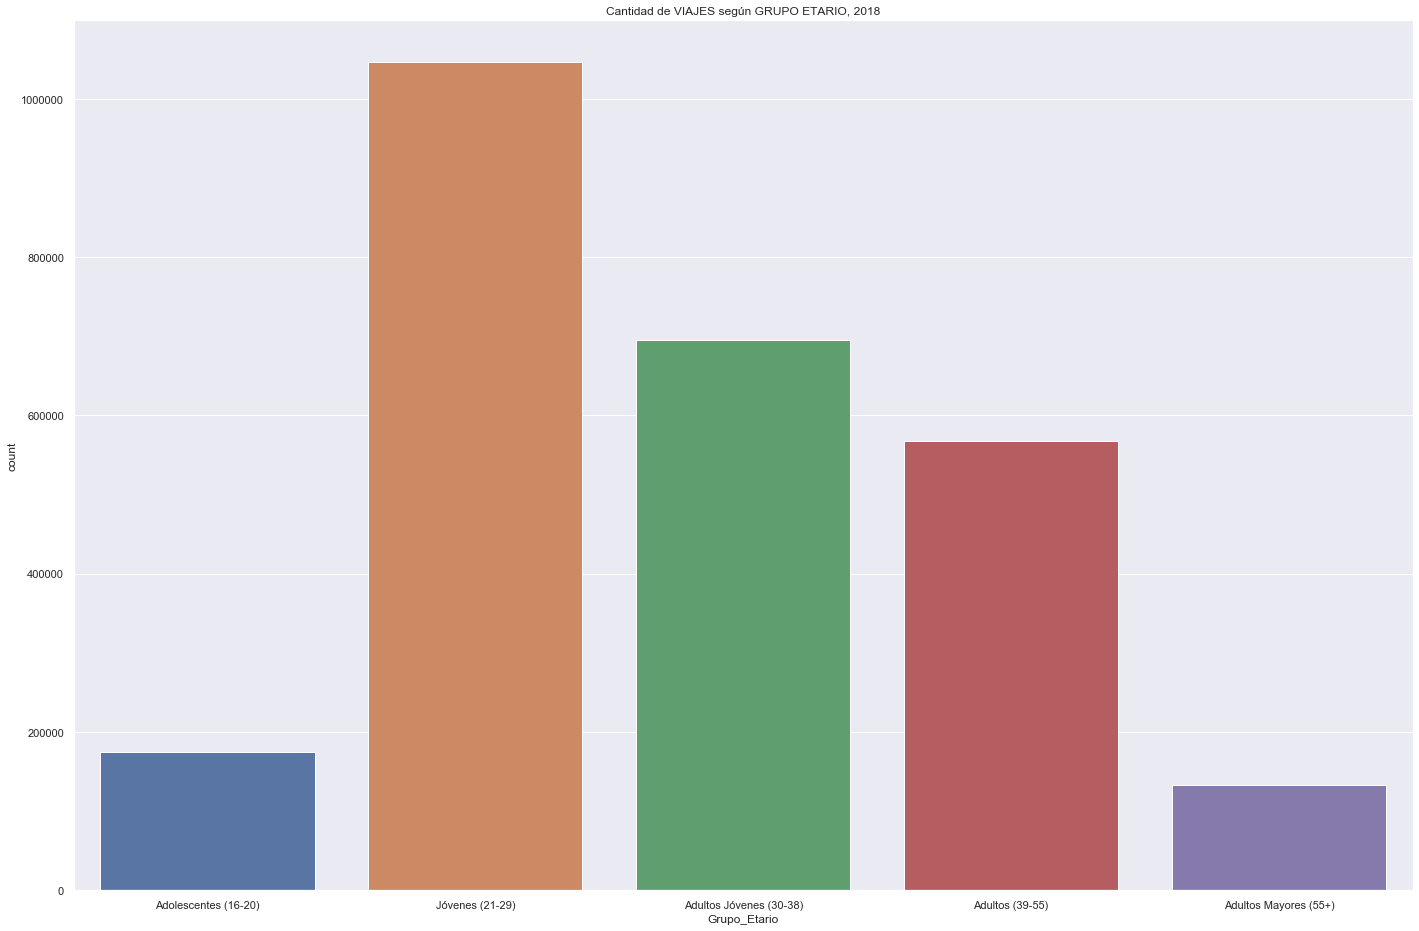

In [85]:
sns.set(style="darkgrid")
sns.countplot("Grupo_Etario", data=df).set_title("Cantidad de VIAJES según GRUPO ETARIO, 2018")

## RTA: El segmento etario que más utilizó el sistema fue "jóvenes" , conformado por M y F entre 21 y 29 años.

### OTROS GRÁFICOS QUE ILUSTRAN SOBRE LA EDAD DE LOS USUARIOS

Text(0.5, 1.0, 'Cantidad de VIAJES según EDAD, 2018')

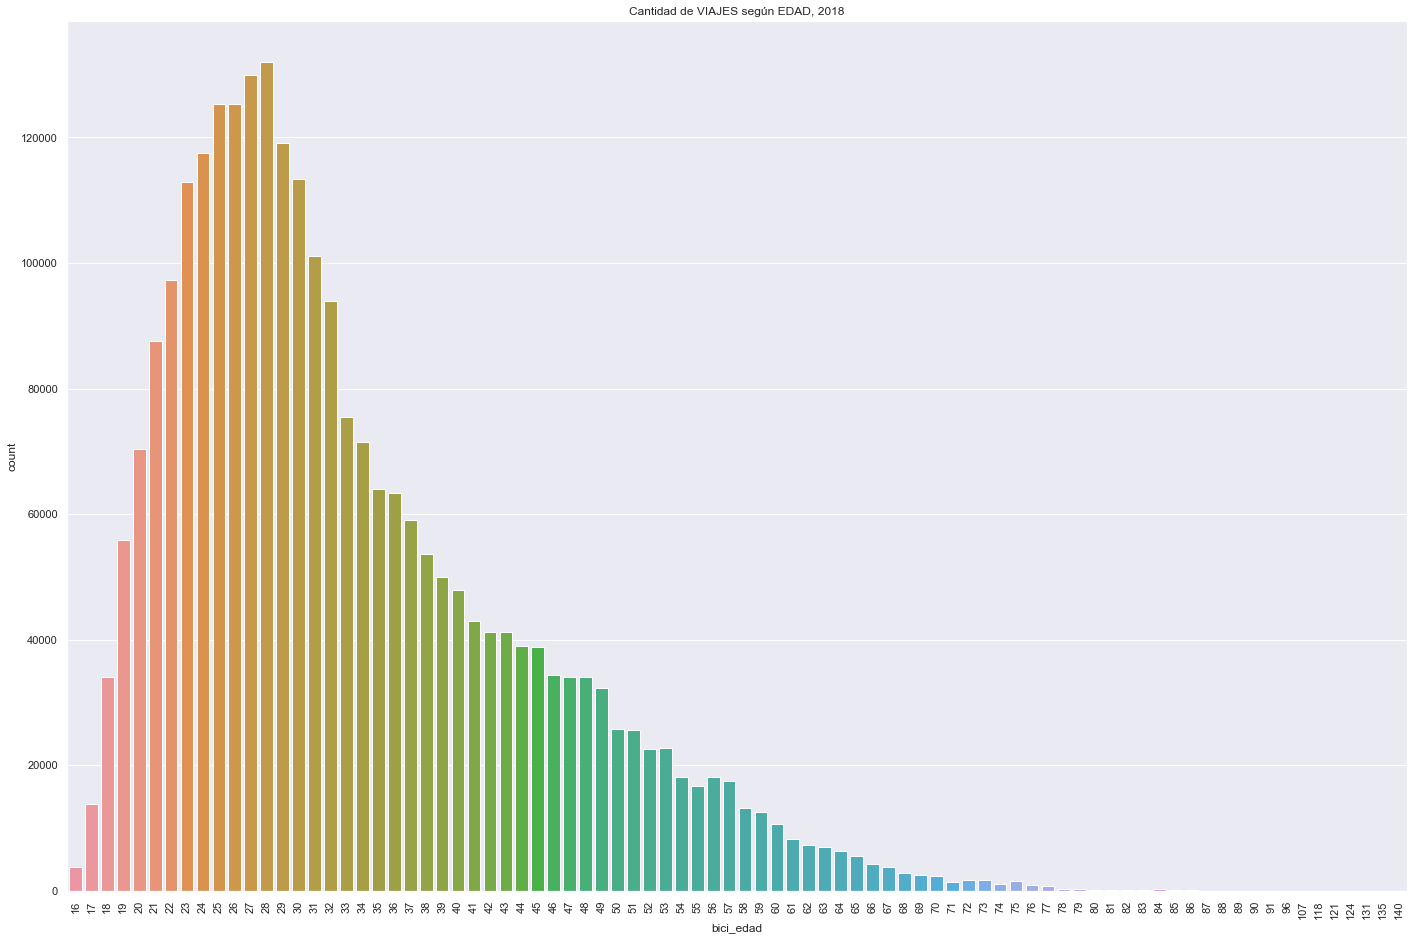

In [83]:
#4. 
plt.xticks(rotation = 90)
sns.set(style="darkgrid")
sns.countplot("bici_edad", data=df).set_title("Cantidad de VIAJES según EDAD, 2018") #cómo eliminar los valores superiores del gráfico?

In [7]:
mediana = df["bici_edad"].median()
print(mediana)

30.0


In [23]:
#filtrado de acuerdo a un criterio (EDAD)
df[df.bici_edad >= 90]

,bici_id_usuario,bici_Fecha_hora_retiro,bici_tiempo_uso,bici_nombre_estacion_origen,bici_estacion_origen,bici_nombre_estacion_destino,bici_estacion_destino,bici_sexo,bici_edad
374313,533278,2018-04-05 14:42:45,0 days 00:30:31.000000000,Montevideo,27,Marcelo T. de Alvear,135,F,96
451484,533278,2018-04-18 13:16:00,0 days 00:43:17.000000000,Marcelo T. de Alvear,135,Marcelo T. de Alvear,135,F,96
460295,533278,2018-04-19 13:12:14,0 days 00:33:58.000000000,Córdoba,62,Marcelo T. de Alvear,135,F,96
466577,533278,2018-04-20 03:35:54,0 days 00:18:18.000000000,Once,13,Marcelo T. de Alvear,135,F,96
506567,533278,2018-04-25 15:40:38,0 days 00:25:54.000000000,Marcelo T. de Alvear,135,Marcelo T. de Alvear,135,F,96
...,...,...,...,...,...,...,...,...,...
2464660,404308,2018-11-27 20:24:41,0 days 00:11:35.000000000,Aranguren,188,Lerma,109,M,140
2487620,404308,2018-12-03 19:50:30,0 days 00:13:16.000000000,Aranguren,188,Lerma,109,M,140
2518687,404308,2018-12-07 20:47:42,0 days 00:15:15.000000000,Yatay,121,Coronel Díaz,59,M,140
2519643,404308,2018-12-08 00:19:16,0 days 00:05:48.000000000,Coronel Díaz,59,Coronel Díaz,59,M,140


In [8]:
df.bici_edad.describe()

count    2.619968e+06
mean     3.322898e+01
std      1.112349e+01
min      1.600000e+01
25%      2.500000e+01
50%      3.000000e+01
75%      3.900000e+01
max      1.400000e+02
Name: bici_edad, dtype: float64

## La moda para la edad fue de 28 años, la mediana 30, y el promedio 33.22 años. 

Text(0.5, 1.0, 'Distribución de agregados de la variable EDAD para el uso de la bici, 2018')

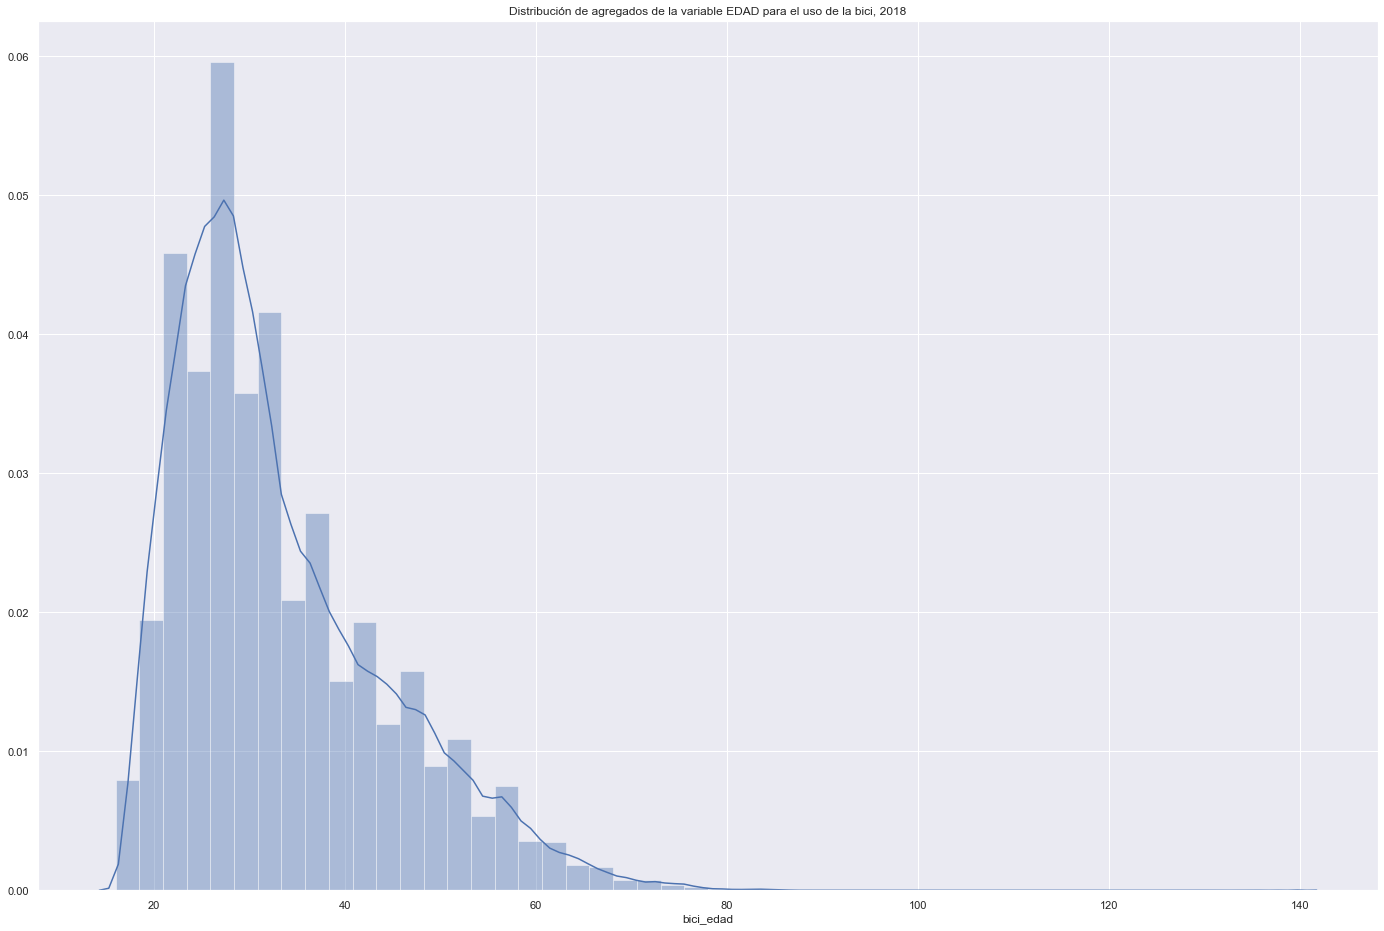

In [39]:
sns.set(style="darkgrid")
sns.distplot(df["bici_edad"]).set_title("Distribución de agregados de la variable EDAD para el uso de la bici, 2018")

## La distribución de la variable edad presenta una *asimetría estadística positiva*.

# 5. value counts de origen y destino. Si son iguales, no hay.

In [5]:
df.groupby("bici_nombre_estacion_origen").bici_tiempo_uso.mean()

DataError: No numeric types to aggregate

# 3) Conclusión
En cuanto a los datos, sólo queda repetir lo dicho más arriba: ...

En cuanto al dataset, por tratarse de un recurso elaborado por un área específicamente a su cargo -Secretaría General y Relaciones Internacionales. Subsecretaría Gestión Estratégica y Calidad Institucional. Dirección General Calidad Institucional y Gobierno Abierto, Jefatura de Gobierno GCBA- relativamente fácil de trabajar, ya que no tuve que realizar "labeling" de las variables relacionadas con las estaciones de origen y destino, y no hay muchos NaNs.

# 4) DESAFÍO: ¿Qué otras preguntas se les ocurren para hacerse con este Dataset?
Podríamos bajar más datasets y hacer comparaciones interanuales de las variables que estudiamos y/o otras. Hay que tener en cuenta que la red  de estaciones de bici era más pequeña en años anteriores.

Podríamos comparar los porcentajes de uso por parte de M o F entre BA y otras ciudades, como por ejemplo Amsterdam, ciudad paradigma del uso de la bicicleta y de la igualdad.
